# Navit Chest X-Rays Classification

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Import the library to mount Google Drive
from google.colab import drive

#Step 2: Mount the Drive
#Next, use the `mount` function to mount your Google Drive.
#The `mount` function requires the path where you want to mount the drive, which is usually
#`/content/drive`.

# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive


Mounted at /content/drive
MyDrive


In [ ]:
import os

# List the contents of your Google Drive root directory
root_dir = '/content/drive/My Drive/'
print('root_dir content:', os.listdir(root_dir))

root_dir content: ['Colab Mnist Coursera and Udacity', 'flight_delay', 'Colab Notebooks', 'cs231n', 'DataSets']


In [ ]:

# List the contents of a specific directory
sub_dir = '/content/drive/MyDrive/DataSets/data_chest_xray/train/PNEUMONIA'  # Replace with your actual subdirectory name
print(os.listdir(os.path.join(root_dir, sub_dir)))
print(os.path.join(root_dir, sub_dir))
datapath = '/content/drive/MyDrive/DataSets/data_chest_xray/train/NORMAL'
print(os.listdir(datapath))


['person544_virus_1075.jpeg', 'person537_virus_1067.jpeg', 'person539_virus_1069.jpeg', 'person53_bacteria_254.jpeg', 'person542_virus_1072.jpeg', 'person53_bacteria_252.jpeg', 'person540_bacteria_2272.jpeg', 'person544_virus_1076.jpeg', 'person540_bacteria_2273.jpeg', 'person538_virus_1068.jpeg', 'person539_bacteria_2270.jpeg', 'person543_bacteria_2279.jpeg', 'person538_bacteria_2268.jpeg', 'person541_bacteria_2275.jpeg', 'person540_virus_1070.jpeg', 'person537_bacteria_2265.jpeg', 'person543_bacteria_2282.jpeg', 'person53_bacteria_253.jpeg', 'person537_bacteria_2266.jpeg', 'person53_bacteria_255.jpeg', 'person543_bacteria_2281.jpeg', 'person547_bacteria_2292.jpeg', 'person548_bacteria_2302.jpeg', 'person547_bacteria_2296.jpeg', 'person550_bacteria_2308.jpeg', 'person549_virus_1089.jpeg', 'person544_virus_1080.jpeg', 'person550_virus_1090.jpeg', 'person547_virus_1086.jpeg', 'person545_bacteria_2289.jpeg', 'person548_bacteria_2297.jpeg', 'person548_bacteria_2301.jpeg', 'person551_virus

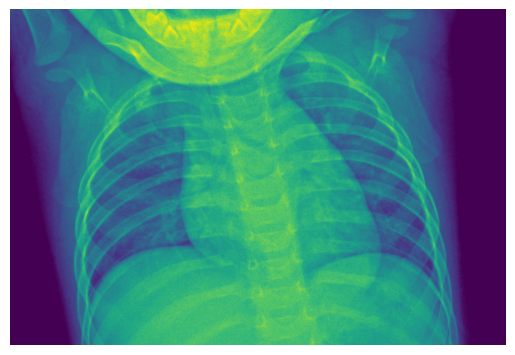

In [ ]:
from PIL import Image

image_path = datapath+'/IM-0133-0001.jpeg'
# Load and display the image
try:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print("Error: Image not found at the specified path.")



# DataLoader

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device is {device}.")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


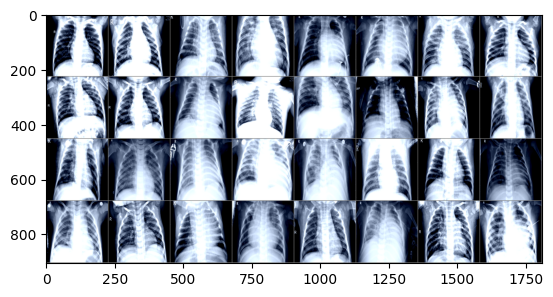

PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA


In [ ]:
#import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torchvision
import torch

# Define the root directory and train directory
project_dir = '/content/drive/MyDrive/DataSets/data_chest_xray/'  # Replace with your actual directory
train_dir = os.path.join(project_dir, 'train')

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    # Normalize with ImageNet statistics
])
#should find my mean and std of train and normalize
# Load the dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)


#from Mikhail
transform2 = transforms.Compose([
    transforms.Resize(256),      # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),  # Crop the center 224x224 pixels
    transforms.ToTensor()
])

# Alternative transform with normalization
#transform = transforms.Compose([
#    transforms.Resize(256),      # Resize the shorter side to 256 pixels
#    transforms.CenterCrop(224),  # Crop the center 224x224 pixels
#    transforms.ToTensor()
#    transforms.Normalize(
#        mean=[0.5744934678077698, 0.5744934678077698, 0.5744934678077698],
#        std=[0.1641257107257843, 0.1641257107257843, 0.1641257107257843]
#    )
#])












# Create the DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join('%5s' % train_dataset.classes[labels[j]] for j in range(4)))


In [ ]:
len( train_dataset ) #4560
#should be: 1341+3875=5216
#I am missing some of the files.

4560

In [ ]:
print(train_dataset.classes)  # Should output: ['NORMAL', 'PNEUMONIA']
print(train_dataset.class_to_idx)  # Should output: {'NORMAL': 0, 'PNEUMONIA': 1}


['NORMAL', 'PNEUMONIA']
{'NORMAL': 0, 'PNEUMONIA': 1}
